# Random Forests and Bagging

A Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the average of the classifications of the individual trees. This method leverages the power of multiple models to improve accuracy and reduce overfitting, as if the models are trained on different subests of the data they should make different mistakes that average out.

Key characteristics of Random Forests:
- **Ensemble of Decision Trees**: Combines the predictions of multiple decision trees to make a final prediction.
- **Random Subsampling**: Each tree is trained on a random subset of the data, introducing diversity among the trees.

## Bagging
Bagging, short for Bootstrap Aggregating, is a general ensemble method that aims to improve the stability and accuracy of machine learning algorithms. It works by training multiple models on different bootstrap samples (random samples with replacement) of the dataset and aggregating their predictions.

Key characteristics of Bagging:
- **Bootstrap Sampling**: Each model is trained on a different random sample of the data.
- **Parallel Training**: Models are trained independently, making bagging highly parallelizable.
- **Reduced Variance**: By averaging predictions, bagging reduces the variance of the model, making it less prone to overfitting.

Random Forests are a specific implementation of bagging where decision trees are used as the base learners. 

Both Random Forests and Bagging are powerful techniques that leverage the wisdom of the crowd to create robust predictive models.


In [186]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [187]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class

D = pd.concat([banknote_df.iloc[:100], banknote_df.iloc[762:862]]) # reduces the data set size to 50 of each

# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['variance', 'skewness']].values



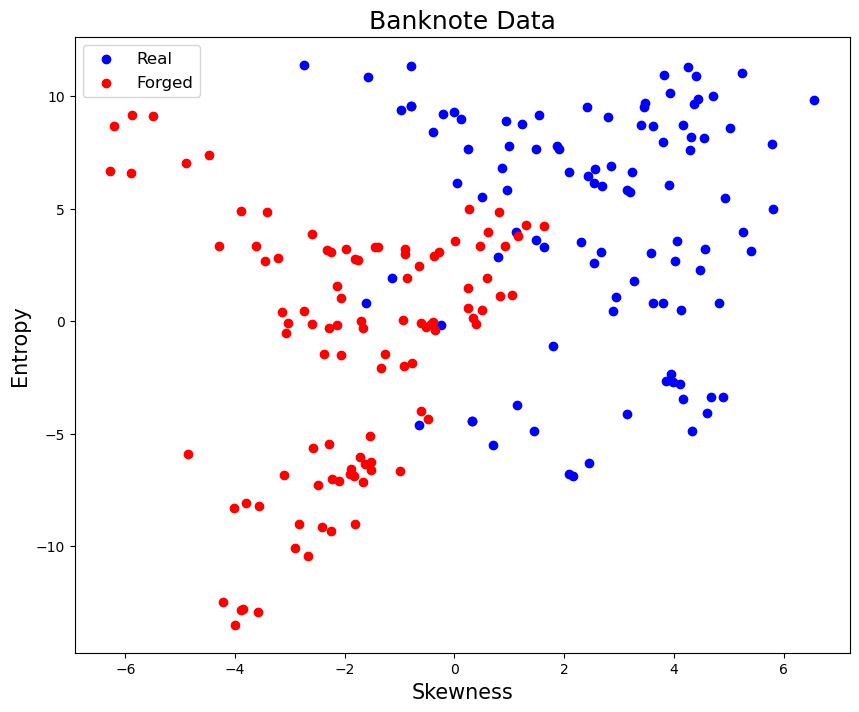

In [188]:
plt.figure(figsize=(10, 8))
plt.title("Banknote Data", fontsize=18)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Real')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Forged')

plt.xlabel("Skewness", fontsize=15)
plt.ylabel("Entropy", fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [189]:

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# split training data 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 9)


In [190]:

lone_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
lone_clf.fit(X_train, y_train)
lone_y_pred = lone_clf.predict(X_test)
print(f"Lone Classification Report")
print(classification_report(y_test, lone_y_pred), "\n")


Lone Classification Report
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.86      0.97      0.91        37

    accuracy                           0.91        80
   macro avg       0.92      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80
 



In [191]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.83      0.92      0.87        37

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80
 



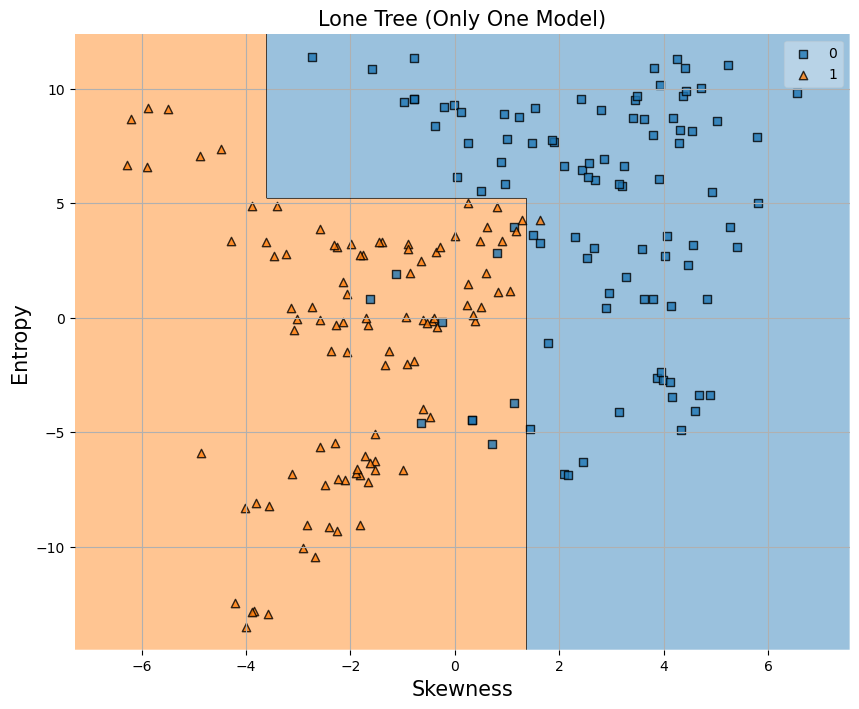

In [192]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = lone_clf)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Entropy", fontsize = 15)
plt.title("Lone Tree (Only One Model)", fontsize = 15)
plt.grid()
plt.show()

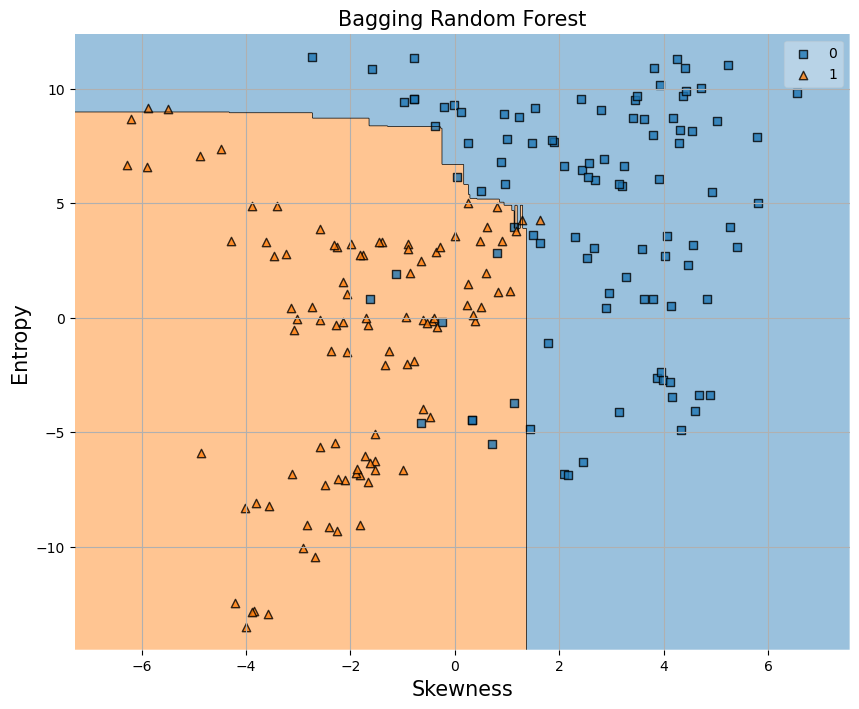

In [193]:

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Entropy", fontsize = 15)
plt.title("Bagging Random Forest", fontsize = 15)
plt.grid()
plt.show()

### Effect of Bagging/Random Forest

The bagged model provides a much smoother separation, with non-linear curves forming the decision boundaries. Interestingly, the bagged model performs slightly worse than a single decision tree in this case. However, it makes the classification more robust, producing smoother and more generalized decision boundaries.